<a href="https://colab.research.google.com/github/geomania28/Alzheimer-MRI_TinyCNN/blob/main/Healo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
import json
# to load the json file and create it into a dataframe
with open(r'/content/intents.json') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [5]:
# To split all the patterns
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,google,google,[Redirecting to Google...]
1,google,search,[Redirecting to Google...]
2,google,internet,[Redirecting to Google...]
3,greeting,Hi there,"[Hello, Good to see you again, Hi there, how c..."
4,greeting,How are you,"[Hello, Good to see you again, Hi there, how c..."
...,...,...,...
108,riddle,Ask me a question,[What two things can you never eat for breakfa...
109,riddle,Riddle,[What two things can you never eat for breakfa...
110,age,how old are you,"[I was made in 2020, if that's what you are as..."
111,age,when were you made,"[I was made in 2020, if that's what you are as..."


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' and 'stopwords' resources from NLTK
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Create a lemmatizer object and define the list of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to lemmatize and remove stopwords from a sentence
def process_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Lemmatize each word that is not a stopword and join them back into a sentence
    processed_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words])
    return processed_sentence

df['pattern'] = ''
for i in range(0,len(df)):
  df['pattern'][i] = process_sentence(df['patterns'][i])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-8-1eb67881c9ce>:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensu

,tag,patterns,responses,pattern
0,google,google,[Redirecting to Google...],google
1,google,search,[Redirecting to Google...],search
2,google,internet,[Redirecting to Google...],internet
3,greeting,Hi there,"[Hello, Good to see you again, Hi there, how c...",Hi
4,greeting,How are you,"[Hello, Good to see you again, Hi there, how c...",
...,...,...,...,...
108,riddle,Ask me a question,[What two things can you never eat for breakfa...,Ask question
109,riddle,Riddle,[What two things can you never eat for breakfa...,Riddle
110,age,how old are you,"[I was made in 2020, if that's what you are as...",old
111,age,when were you made,"[I was made in 2020, if that's what you are as...",made


In [9]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

number of unique words =  129
X shape =  (113, 6)
y shape =  (113,)
num of classes =  30


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 6, 100)              │          13,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 6, 32)               │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 6, 32)               │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 6, 32)               │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 6, 32)               │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,974 (281.15 KB)

 Trainable params: 71,974 (281.15 KB)

 Non-trainable params: 0 (0.00 B)

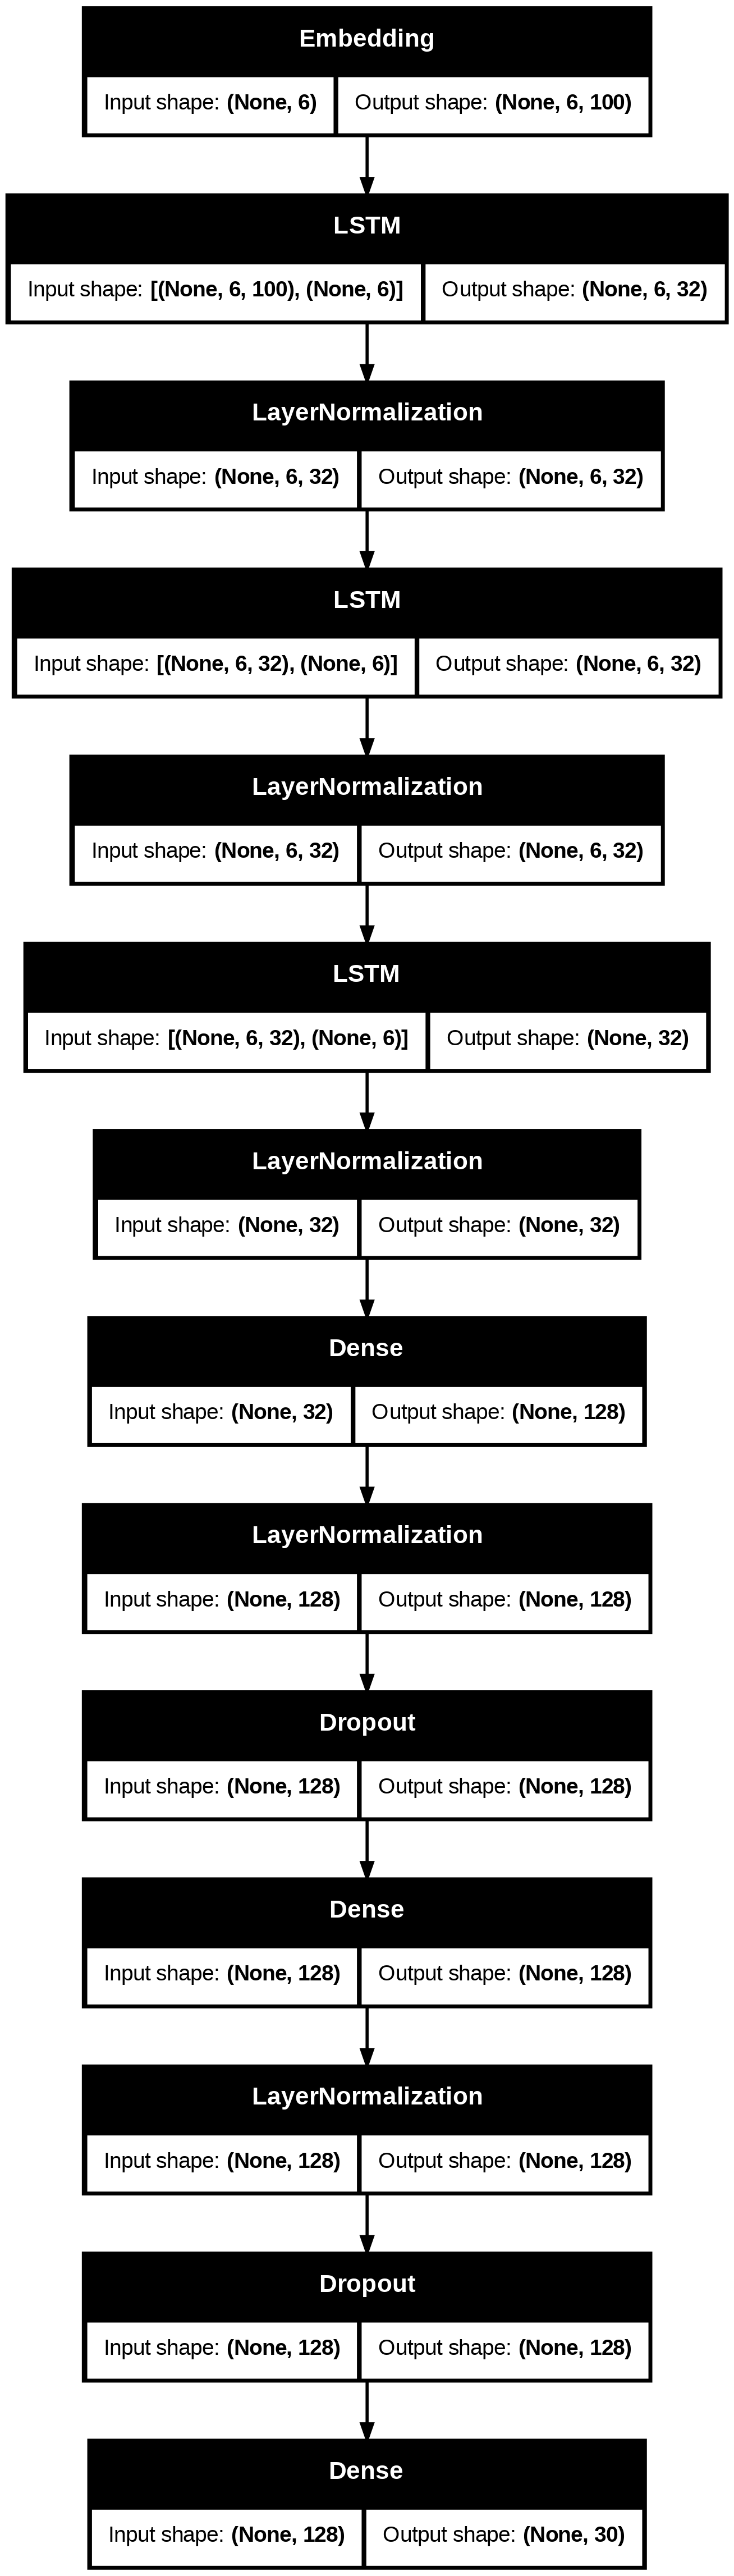

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1],))) #model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))#model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True)) # converts indexes to dense vectors of fixed size
model.add(LSTM(32, return_sequences=True)) # long short term memory
model.add(LayerNormalization()) # normalize activations of previos layers independently, BatchNormalization()
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu")) # regular densely connected NN, relu = rectified linear unit activation, max(0, input tensor)
model.add(LayerNormalization())
model.add(Dropout(0.2)) # set input unit to 0, rate = 0.2
model.add(Dense(128, activation="relu")) # leakyRelu (allows small gradient), = alpha*x(x<0), x(x>0)
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax")) # softmax converts vector of values to probability distribution, sum=1, 0<x<1
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy']) # adam = gradient descent method
# loss = crossentropy loss between the labels and predictions
model.summary()
plot_model(model, show_shapes=True)

In [14]:
import re
import random

def model_response(query):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', query)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("Chatbot: {}".format(random.choice(responses)))

In [ ]:
model_response('I am feeling low today')

In [16]:
!pip install transformers
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function for predicting sentiment of text
def predict_sentiment(text):
    # Tokenize text and convert to input ids and attention mask
    inputs = tokenizer1(text, return_tensors='pt')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Predict sentiment using BERT model
    with torch.no_grad():
        logits = model1(input_ids, attention_mask=attention_mask)[0]
    probs = torch.softmax(logits, dim=1).tolist()[0]

    # Determine sentiment label based on highest probability
    sentiment = 'Positive' if probs[1] > probs[0] else 'Negative'

    return sentiment

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Define the main loop
print('Chatbot: Welcome to Infiheal. What problem are you facing?')
count = 0

while True:
    # Get user input
    message = input("You: ")
    sentiment = predict_sentiment(message)
    print('Sentiment: '+sentiment)
    if sentiment=='negative':
      count+=1
    if message=='quit':
      if count>5:
        print('High Risk: You will be contacted to the nearest distress helpline soon')
      elif count>3:
        print('Moderate Risk: We recommend you connecting our therapist at +91 00000 0000')
      else:
        print('Low Risk: Team Infiheal wishes you good health, stay healthy')
      break

    # Generate a response
    try:
      model_response(message)
    except:
      print('An Exception Occured')

Chatbot: Welcome to Infiheal. What problem are you facing?
You: hi
Sentiment: Negative
An Exception Occured
You: hello
Sentiment: Negative
An Exception Occured
You: good
Sentiment: Positive
An Exception Occured
You: best
Sentiment: Negative
An Exception Occured
You: hill
Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Chatbot: I am Ted, a Deep-Learning chatbot


In [ ]:
# LLM's (Large Language Models) can also be used by processing large amounts of data using statistical techniques to learn patterns and relationships between words,
# phrases, and sentences. They are based on neural networks and are trained using supervised learning. A large amount of data is required to train the model.
#  Once the model is trained, it can be used to predict the likelihood of the next word based on the preceding words. There are several chatbot building platforms
# that incorporate LLM technology, such as Dialogflow, Botpress, and Rasa (just import the api's). LangChain is a framework built around LLM's.